In [1]:
import pandas as pd
df =pd.read_csv("https://raw.githubusercontent.com/NaomiTapia/Estadisticaverano/refs/heads/main/insurance.csv")
df=df.dropna()
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Mi variable dependiente (y) es charges
#age:No hay anomalias en el histograma
#sex:Si hubo diferencia significativa entre grupos, male:1 female:2
#bmi:No hay anomalias en el histograma
#children:No hay anomalias en el histograma
#smoker: Si hubo diferencia significativa entre grupos, yes:1 no:2
#region: Si hubo diferencia significativa entre grupos


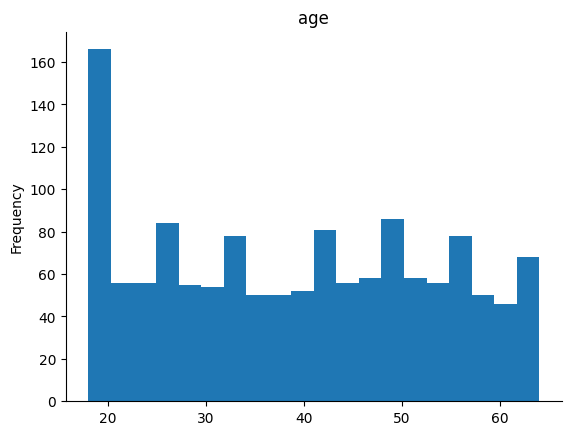

In [15]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal=ols("charges ~ C(sex)",data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
print(tabla_anova)
#Ho:Todas las medias poblacionales son iguales.
#H1:Al menos una media poblacional es diferente.
#alpha:0.05
#Anova:0.036133 Se rechaza la hipotesis nula, al menos una de ellas es diferencte (si es mas chico se rechaza)

              df        sum_sq       mean_sq         F    PR(>F)
C(sex)       1.0  6.435902e+08  6.435902e+08  4.399702  0.036133
Residual  1336.0  1.954306e+11  1.462804e+08       NaN       NaN


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj   lower    upper   reject
-------------------------------------------------------
female   male 1387.1723 0.0361 89.8123 2684.5324   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

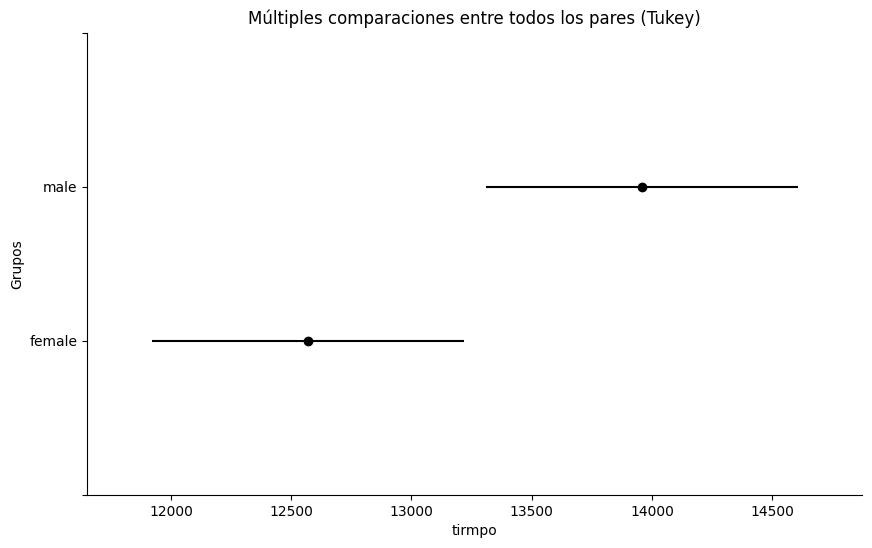

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['charges'], groups=df['sex'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="tirmpo")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [19]:
df["sex"]= df["sex"].map({"male":1,"female":2})
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,2,31.920,0,no,northeast,2205.98080
1335,18,2,36.850,0,no,southeast,1629.83350
1336,21,2,25.800,0,no,southwest,2007.94500


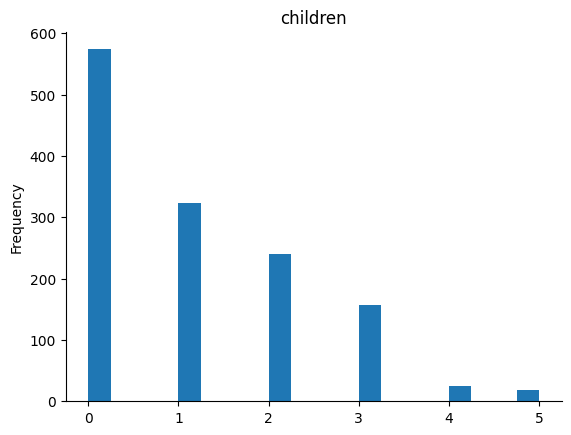

In [21]:
# @title children

from matplotlib import pyplot as plt
df['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

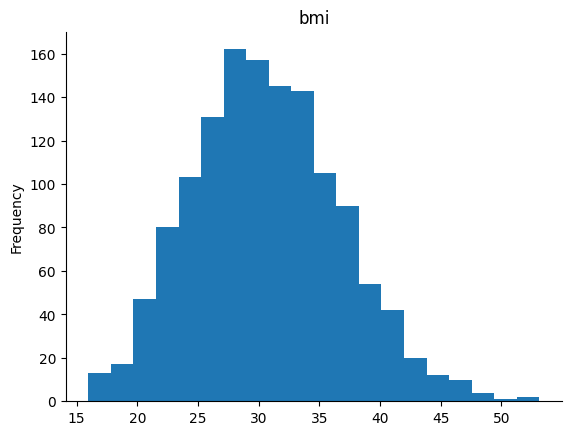

In [22]:
# @title bmi

from matplotlib import pyplot as plt
df['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal=ols("charges ~ C(smoker)",data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
print(tabla_anova)
#Ho:Todas las medias poblacionales son iguales.
#H1:Al menos una media poblacional es diferente.
#alpha:0.05
#Anova:0.0000 Se rechaza la hipotesis nula, al menos una de ellas es diferencte (si es mas chico se rechaza)

               df        sum_sq       mean_sq            F         PR(>F)
C(smoker)     1.0  1.215199e+11  1.215199e+11  2177.614868  8.271436e-283
Residual   1336.0  7.455432e+10  5.580413e+07          NaN            NaN


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    no    yes 23615.9635   0.0 22623.1748 24608.7523   True
-----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

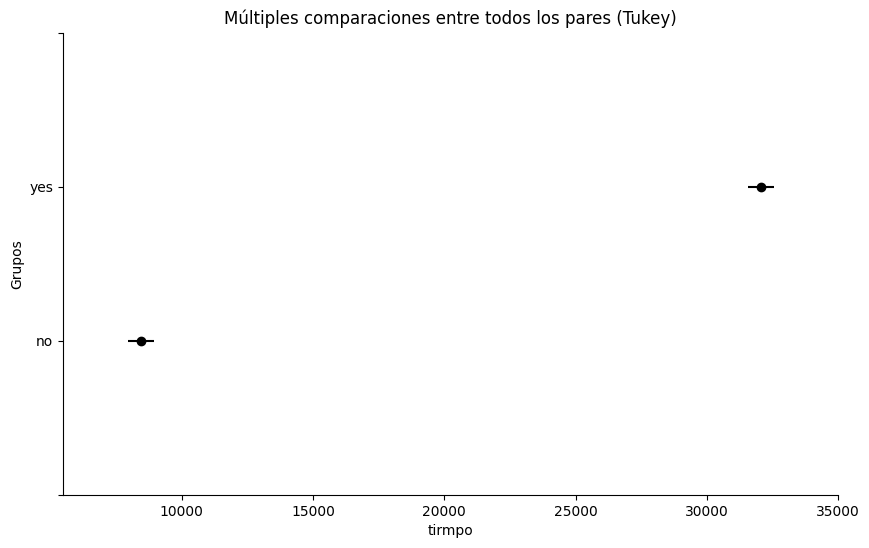

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['charges'], groups=df['smoker'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="tirmpo")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [26]:
df["smoker"]= df["smoker"].map({"yes":1,"no":2})
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,2,southeast,1725.55230
2,28,1,33.000,3,2,southeast,4449.46200
3,33,1,22.705,0,2,northwest,21984.47061
4,32,1,28.880,0,2,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,2,northwest,10600.54830
1334,18,2,31.920,0,2,northeast,2205.98080
1335,18,2,36.850,0,2,southeast,1629.83350
1336,21,2,25.800,0,2,southwest,2007.94500


In [2]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal=ols("charges ~ C(region)",data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
print(tabla_anova)
#Ho:Todas las medias poblacionales son iguales.
#H1:Al menos una media poblacional es diferente.
#alpha:0.05
#Anova:0.030893 Se rechaza la hipotesis nula, al menos una de ellas es diferencte (si es mas chico se rechaza)

               df        sum_sq       mean_sq         F    PR(>F)
C(region)     3.0  1.300760e+09  4.335866e+08  2.969627  0.030893
Residual   1334.0  1.947735e+11  1.460071e+08       NaN       NaN


In [3]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['region'] == 'southwest']['charges']
grupo2 = df[df['region'] == 'southeast']['charges']
grupo3 = df[df['region'] == 'northwest']['charges']
grupo4 = df[df['region'] == 'northeast']['charges']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho:Las varianzas de los grupos son iguales. (No hay diferencia significativa en las varianzas entre los grupos comparados).
#H1:Al menos una de las varianzas de los grupos es diferente. (Existe una diferencia significativa en las varianzas entre al menos dos grupos).
#alpha:0.05
#Levene:0.0008610, Se recha la hipotesis nula, no tiene caso hacer BoxCox, pasamos a Tukey para observar de mejor manera

p-valor de Levene: 0.0008610590250786703


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

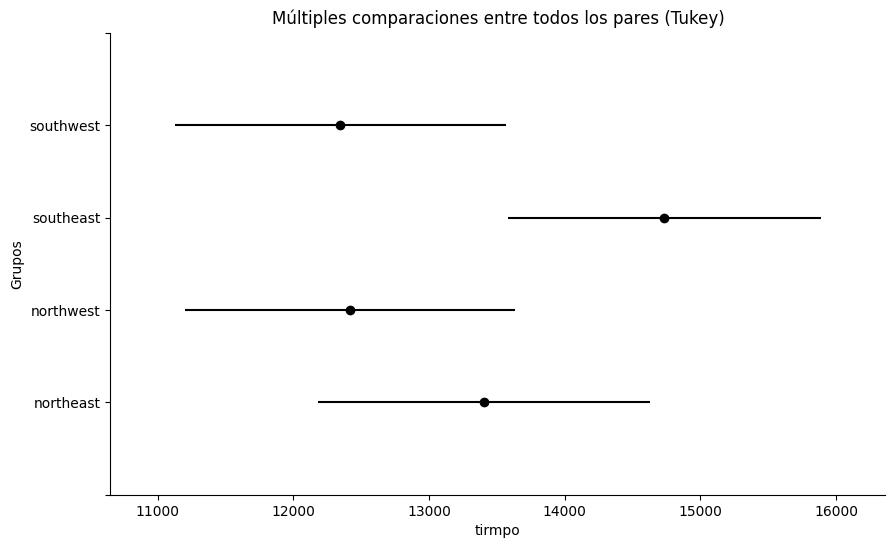

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['charges'], groups=df['region'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="tirmpo")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Todas tocan con una linea vertical por lo tanto si pero muy poquito
#Conclusion: Realmente no hay diferencia significativa entre la region y el precio que se paga por los servicios de salud


In [29]:
df["region"]= df["region"].map({"southwest":1,"southeast":2,"northwest":3,"norteast":4})
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1.0,16884.92400
1,18,1,33.770,1,2,2.0,1725.55230
2,28,1,33.000,3,2,2.0,4449.46200
3,33,1,22.705,0,2,3.0,21984.47061
4,32,1,28.880,0,2,3.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,2,3.0,10600.54830
1334,18,2,31.920,0,2,NaN,2205.98080
1335,18,2,36.850,0,2,2.0,1629.83350
1336,21,2,25.800,0,2,1.0,2007.94500


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'bmi'),
  Text(0, 3.5, 'children'),
  Text(0, 4.5, 'smoker'),
  Text(0, 5.5, 'region'),
  Text(0, 6.5, 'charges')])

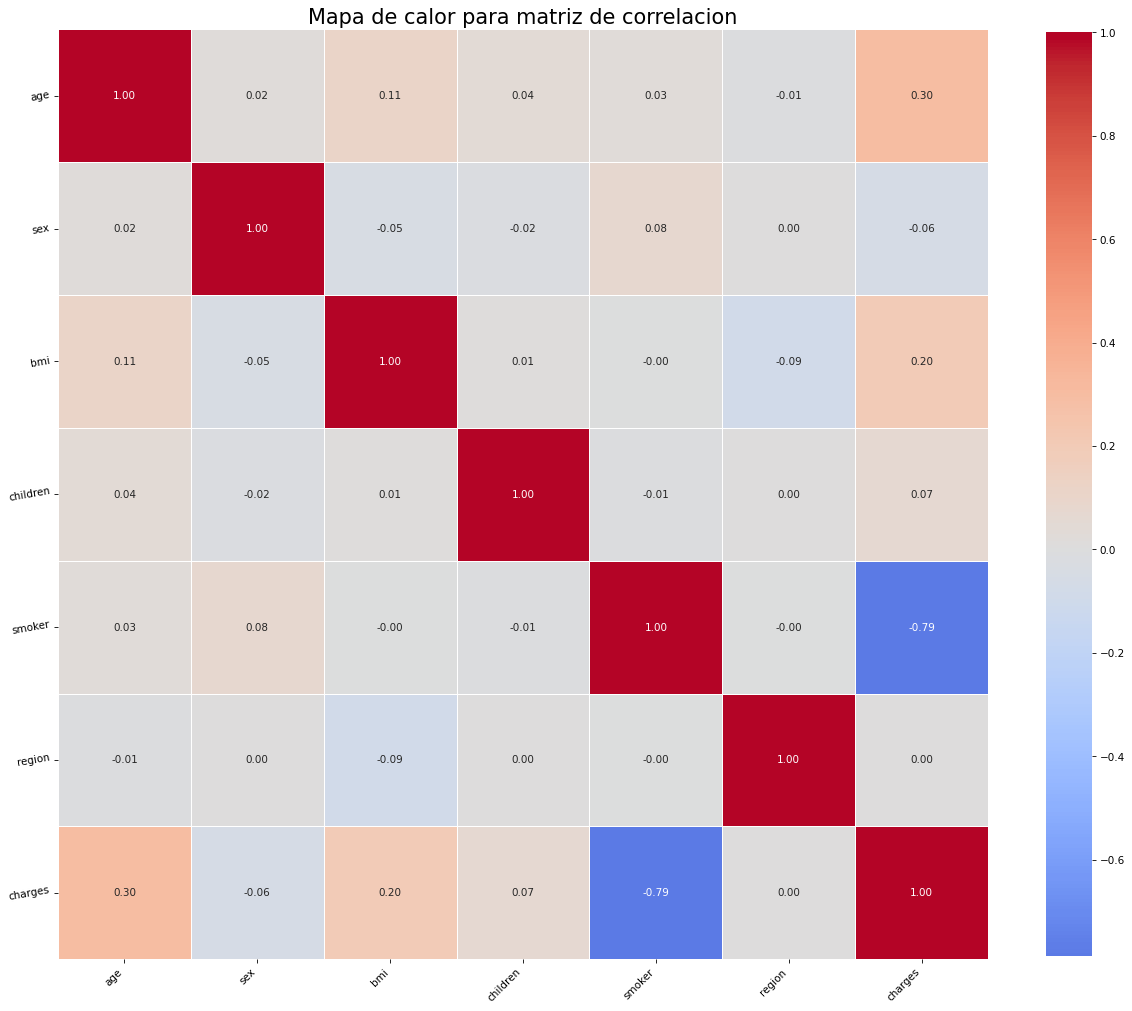

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion=df.corr()
plt.figure(figsize=(20,20),dpi=75)
sns.heatmap(
    matriz_de_correlacion,#LO QUE VA A GRAFICAR
    annot=True,#SE MUESTRAN LOS VALORES EN LAS CELDAS
    fmt="0.2f",#0.2f SIGNIFICA "DOS DECIMALES"
    cmap="coolwarm",#PALETA DE COLORES
    square=True,#FORZA CUADRADOS
    linewidths=0.5,#GROSOR DE LINEAS
    cbar_kws={"shrink":0.8},#TAMAÑO BARRA LATERAL
    center=0
)
plt.title("Mapa de calor para matriz de correlacion", fontsize=20),
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=10)


In [ ]:
#Entramos más a fondo en la investigacion entre la variable age y charges (La correcta es smoker al ser una variable categorica pasamos a la siguiente en este caso age)

In [36]:
#Seguimos con otra variable sin soltar nuetra variable y=Charges
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal=ols("charges ~ age",data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
print(tabla_anova)
#Ho:Todas las medias poblacionales son iguales.
#H1:Al menos una media poblacional es diferente.
#alpha:0.05
#Anova:0.0, Se rechaza la hipotesis nula

              df        sum_sq       mean_sq           F        PR(>F)
age          1.0  1.753019e+10  1.753019e+10  131.174013  4.886693e-29
Residual  1336.0  1.785440e+11  1.336407e+08         NaN           NaN


In [ ]:
#Las clinicas privadas y los seguros de gobierno pueden salir beneficias de este estudio ya que podemos comprender el promedio del cual esta acostumbrada la gente a pagar y de ahí establecer un precio justo y con un margen de
#utilidad adecuado, observando que hay diferencia significativa se puede concluir que en todo el pais los gastos medicos son muy similares con respecto a la region, la variable que nos da la pauta a que los cargos sean diferentes
#es la variable de la edad, dependiendo de la edad del paciente es más grande o más pequeño el cargo, sin embargo tambien se puede tener un pequeño margen de diferencia entre las regiones. Con este estudio pudimos observar que
#hay una diferencia significativa de los pacientes que fuman y los que no, existe la probabilidad de que se pueda sesgar con respecto a los que si fuman